**Exercise:** Build a logistic regression model for predicting the purchase choice for social network advertisement. Identify the feature that Purchase choice is heavily based on.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.drop(labels=["User ID"], axis=1, inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<AxesSubplot: >

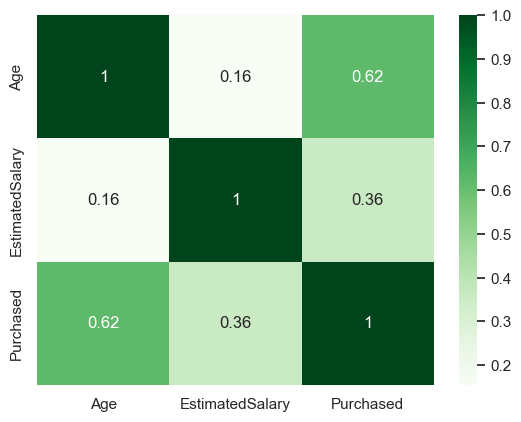

In [4]:
sns.heatmap(
    data = df.drop(labels=["Gender"], axis=1).corr(numeric_only = True),
    annot = True,
    cmap = 'Greens',
)

From above correlation heatmap, Purchased is strongly related to Age. \
Now, calculating the distribution of each variable w.r.t label class (Purchased)

Distribution of Gender

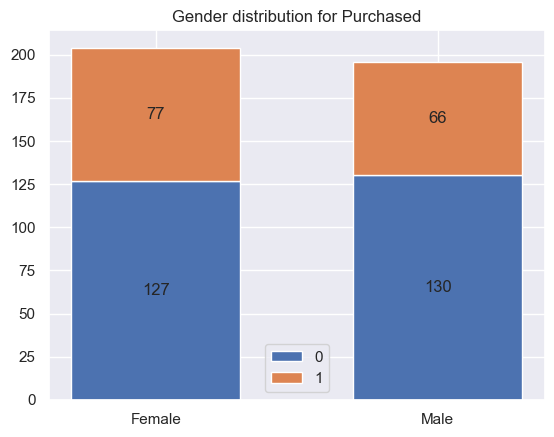

In [5]:
def plot_distribution(col_name, main_col_name, df):
    col_dist = df.groupby([col_name, main_col_name]).size().unstack()
    stack_val = col_dist.to_dict()
    width = 0.6

    fig, ax = plt.subplots()
    bottom = np.zeros(len(col_dist.iloc[0]))
    for layer, val in stack_val.items():
        x = list(val.keys())
        y = list(val.values())
        p = ax.bar(x, y, width, label=layer, bottom=bottom)
        bottom += y
        ax.bar_label(p, label_type='center')

    ax.set_title(f"{col_name} distribution for {main_col_name}")
    ax.legend()
    plt.show()

plot_distribution("Gender", "Purchased", df)

EstimatedSalary distribution

Text(0.5, 1.0, 'Estimated Salary distribution')

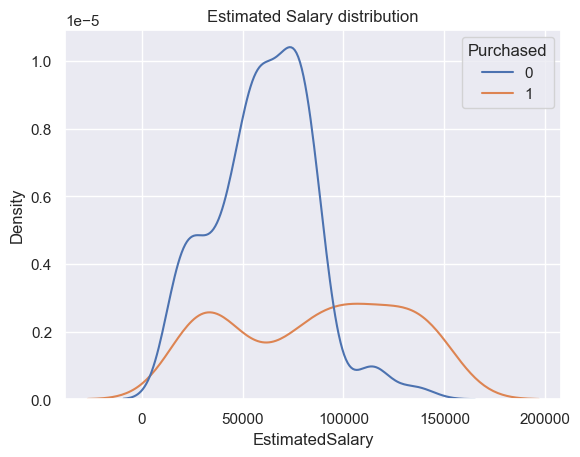

In [6]:
sns.kdeplot(
    data = df,
    x = "EstimatedSalary",
    hue = "Purchased",
).set_title("Estimated Salary distribution")

Age distribution

Text(0.5, 1.0, 'Age distribution')

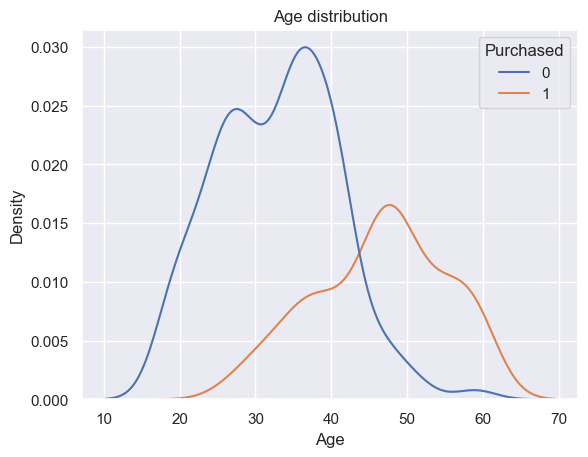

In [7]:
sns.kdeplot(
    data = df,
    x = "Age",
    hue = "Purchased",
).set_title("Age distribution")

Transforming categorical data

In [8]:
df["Gender"].replace({
    "Male": 1,
    "Female": 0,
}, inplace=True)
df.info() # All data types are numeric (int64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


Extracting features and label

In [9]:
X = df[["Gender", "Age", "EstimatedSalary"]].copy()
y = df["Purchased"].copy()

Because EstimatedSalary is too high a number. Let's normalize the features.

In [10]:
# Using mean normalization
es = X["EstimatedSalary"]
mu, std = es.mean(), es.std()
print(f"{mu=}, {std=}")
X["EstimatedSalary"] = (es - es.mean()) / es.std()
X.head()

# Transform funciton for prediction of new values
def transform(num):
    if isinstance(num, list):
        return (np.array(num) - mu) / std
    else:
        return (num - mu) / std

mu=69742.5, std=34096.960282424785


Train and Test split

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

poly = PolynomialFeatures(degree = 3, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train)
X_poly.shape

(280, 19)

In [12]:
model = LogisticRegression()
model.fit(X_poly, y_train)

c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_pred, y_test))

c:\Users\acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: X has 3 features, but LogisticRegression is expecting 19 features as input.

New values

In [ ]:
new_data = {
    "Gender": [1],
    "Age": [40],
    "EstimatedSalary": transform([80_000]),
}
new_df = pd.DataFrame(new_data)
res = model.predict(new_df)
print("Predicted:", res)

Visualizing the decision boundary

Text(0.5, 1.0, "Visualising the 'Decision Boundary'")

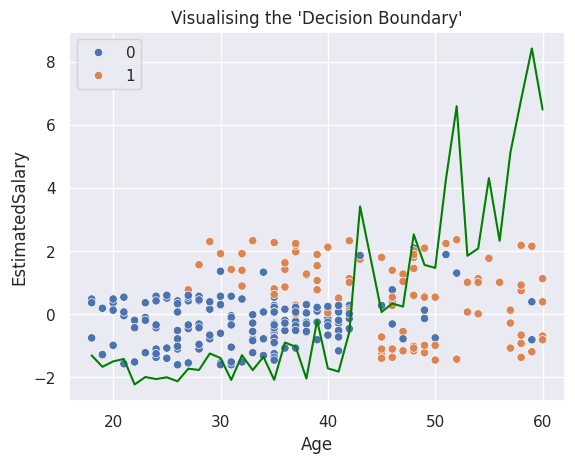

In [ ]:
coef = model.coef_[0]
intercept = model.intercept_[0]

def line_function(row):
    res = row * coef
    return res.sum() + intercept

sns.scatterplot(
    data=X_train.join(y_train),
    x = "Age",
    y = "EstimatedSalary",
    hue = "Purchased",
)

sns.lineplot(
    x = X_train["Age"],
    y = map(line_function, X_poly),
    errorbar = None,
    color = 'green'
).set_title("Visualising the 'Decision Boundary'")